In [2]:
import numpy as np

In [3]:
import pandas as pd 

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:

data = pd.read_csv(r'C:\Users\appir\Desktop\MAIN PROJECT/labeled_data.csv')

In [8]:

data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:

data.shape

(24783, 7)

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [11]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [12]:

data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [13]:

data.filter(items=['class', 'tweet'])

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<AxesSubplot:xlabel='class', ylabel='count'>

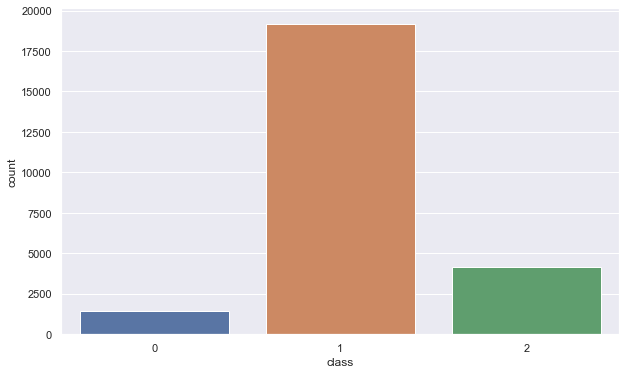

In [14]:

sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x = 'class',data = data)

In [15]:
print(data)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [16]:
!pip install textblob

# Data Preprocessing

1 ) Case conversion

2 ) Removing special characters

3 ) Removing shorthands

4 ) Removing stopwords

5 ) Removing links

6 ) Removing accents

7 ) Normalize spaces

In [17]:
import re
import unidecode
from autocorrect import Speller
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords

In [18]:
#import nltk
#nltk.download('stopwords')


In [19]:
def case_convert():
    data.tweet = [i.lower() for i in data.tweet.values]

def remove_specials():
    data.tweet =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.tweet.values]

def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "\nit's": "it is",
    "\ny'all": "you all",
    "\ni'm": "I am",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "\nshe's":"she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "\nthey're": "they are",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "\nyou're":  "you are",
    "\n\nyou're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.tweet.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.tweet = texts

def remove_shorthands():
     texts=[]
     global string
     words = texts.split()
     for i, word in enumerate(words):
         if word.strip() in CONTRACTION_MAP:
             words[i] = CONTRACTION_MAP[word.strip()]
     string = ' '.join(words)
     texts.append(string)
     data.tweet=texts
    
    
def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.tweet.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    data.tweet = texts
                
def remove_links():
    texts = []
    for text in data.tweet.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.tweet = texts

def remove_accents():
    data.tweet = [unidecode.unidecode(text) for text in data.tweet.values]

def normalize_spaces():
    data.tweet = [re.sub(r"\s+"," ",text) for text in data.tweet.values]

case_convert()
remove_links()
#remove_shorthands()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()

print(data)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0       rt mayas

# Word Cloud Visualization

In [20]:
data_hate = data[data['class']==0]
data_offen = data[data['class']==1]
data_neither = data[data['class']==2]

# Abusive words

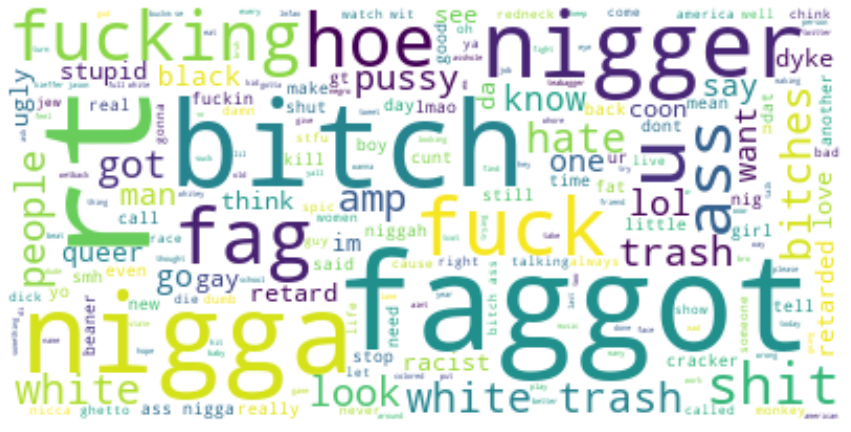

In [21]:
text = " ".join(i for i in data_hate.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#  offensive language

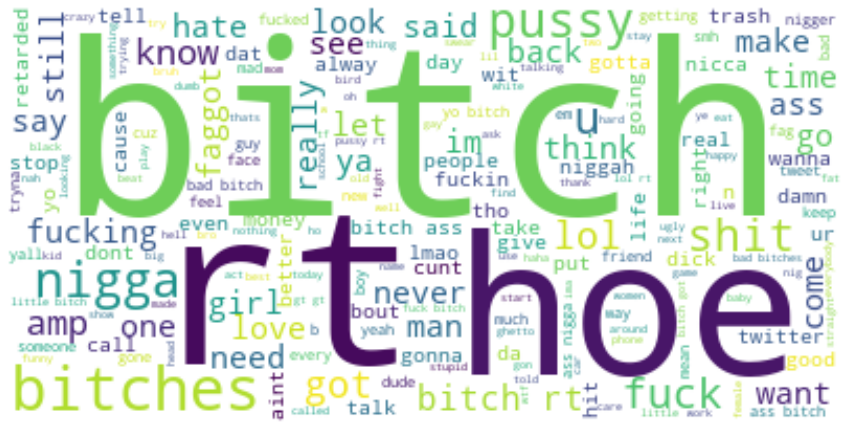

In [22]:
text = " ".join(i for i in data_offen.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# normal

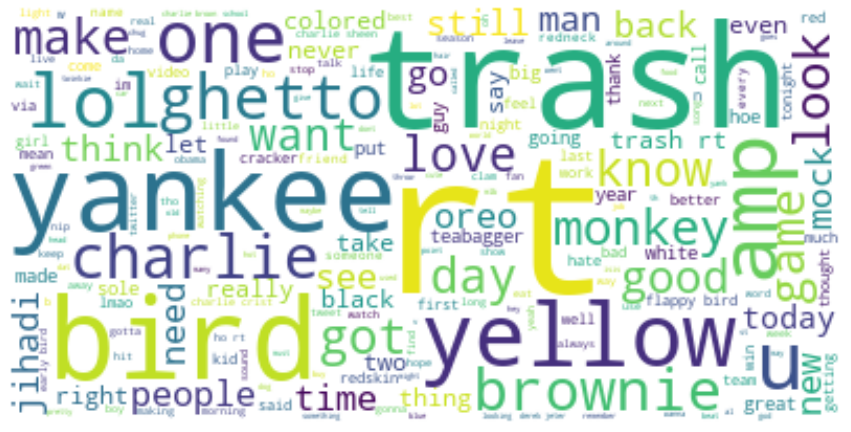

In [23]:
text = " ".join(i for i in data_neither.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
X=data["tweet"]
Y=data["class"]

In [25]:

import pickle

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(X) 

In [26]:
pickle.dump(cv, open(r"C:\Users\appir\Desktop\MAIN PROJECT/count_vectorizer.pickle", "wb"))

In [27]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = data['class'] )


In [28]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (19826, 31288)
X_test shape: (4957, 31288)
Y_train shape: (19826,)
Y_test shape: (4957,)


#  LOGISTIC REGRESSION Algorithm

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

#  Support Vector Classifier Algorithm

In [30]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [31]:

Y_pred_logreg = logreg.predict(X_test)
Y_pred_svc = svc.predict(X_test)

In [32]:

from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)

In [33]:

print("Logistic Regression: " + str(accuracy_logreg * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))


Logistic Regression: 90.72019366552351
Support Vector Classifier: 89.77203954004437


In [34]:
a=accuracy_logreg * 100
c=accuracy_svc * 100



In [35]:
# Classification report
from sklearn.metrics import classification_report
print("Support Vector Machine") 
print(classification_report(Y_test, Y_pred_svc))
print("Logistic Regression") 
print(classification_report(Y_test, Y_pred_logreg))

Support Vector Machine
              precision    recall  f1-score   support

           0       0.39      0.26      0.31       286
           1       0.93      0.95      0.94      3838
           2       0.86      0.87      0.87       833

    accuracy                           0.90      4957
   macro avg       0.73      0.69      0.71      4957
weighted avg       0.89      0.90      0.89      4957

Logistic Regression
              precision    recall  f1-score   support

           0       0.51      0.22      0.30       286
           1       0.93      0.96      0.95      3838
           2       0.86      0.89      0.88       833

    accuracy                           0.91      4957
   macro avg       0.77      0.69      0.71      4957
weighted avg       0.89      0.91      0.90      4957



# Save the model as a pickle

In [36]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svc, r'C:\Users\appir\Desktop\MAIN PROJECT/svm_model.pkl') 

# Load the model from the file 
svm_from_joblib = joblib.load(r'C:\Users\appir\Desktop\MAIN PROJECT/svm_model.pkl')  
  
# Use the loaded model to make predictions 
svm_from_joblib.predict(X_test) 

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

# Abusive contents

In [37]:
message=["Jackies a retard #blondeproblems At least I can make a grilled cheese!"]

vect = cv.transform(message).toarray()
my_prediction = logreg.predict(vect)
print(my_prediction)


[1]


In [38]:
message=["cant you see these hoes wont change"]

vect = cv.transform(message).toarray()
my_prediction = logreg.predict(vect)
print(my_prediction)

[1]


# Normal

In [39]:
message=["Peel up peel up bring it back up rewind back where I'm from they move Shaq from the line"]

vect = cv.transform(message).toarray()
my_prediction = logreg.predict(vect)
print(my_prediction)

[2]
